# Gentrification Modeling

In [2]:
import pandas as pd
import numpy as np
import warnings

In [3]:
#importing individual county/census tract data
warnings.filterwarnings("ignore")
stlouis = pd.read_csv("data/stlouis_county.csv")
denver = pd.read_csv("data/denver_cty.csv")[1:]
kings = pd.read_csv("data/kings_county.csv")[1:]
tarrant = pd.read_csv("data/tarrant_county.csv")[1:]
philly = pd.read_csv("data/philly_county.csv")[1:]
dc = pd.read_csv("data/DC.csv")[1:]
travis = pd.read_csv("data/Travis.csv")[1:]
alameda = pd.read_csv("data/alameda.csv")[1:]
harris = pd.read_csv("data/harris_county.csv")[1:]

In [4]:
#importing state aggregate data
states = pd.read_csv("data/state_aggregate_data.csv")

In [5]:
#compile all census tract data from each county into one dataframe: result
frames = [stlouis, denver, kings, tarrant, philly, dc, travis, alameda, harris]
result = pd.concat(frames)
result.head()

,Qualifying Name,Name of Area,FIPS,Nation,State,County,Census Tract,Total Population,Total Population.1,Total Population.2,...,Total Population: Substituted.2,Total Population.67,Total Population: Not substituted.3,Total Population: Substituted.3,% Total Population: Not substituted,% Total Population: Substituted,% Total Population: Not substituted.1,% Total Population: Substituted.1,% Total Population: Not substituted.2,% Total Population: Substituted.2
0,Geo_QNAME,Geo_NAME,Geo_FIPS,Geo_NATION,Geo_STATE,Geo_COUNTY,Geo_CT,SE_T001_001,SE_NV002_001,SE_NV003_001,...,SE_NV331_003,SE_NV332_001,SE_NV332_002,SE_NV332_003,PCT_SE_T083_002,PCT_SE_T083_003,PCT_SE_NV330_002,PCT_SE_NV330_003,PCT_SE_NV331_002,PCT_SE_NV331_003
1,"Census Tract 2101, St. Louis County, Missouri",Census Tract 2101,29189210100,NaN,29,189,210100,6298,6017,-281,...,258.7558,-4.46173388377263,-8.68227444288547,318.491412310048,98.71,1.29,94.35,5.65,192.08,-92.08
2,"Census Tract 2102, St. Louis County, Missouri",Census Tract 2102,29189210200,NaN,29,189,210200,6248,6441,193,...,189.1432,3.08898847631242,0.0622954416560671,332.665925623672,99.09,0.91,96.18,3.82,2,98
3,"Census Tract 2103, St. Louis County, Missouri",Census Tract 2103,29189210300,NaN,29,189,210300,3627,3466,-161,...,-8.9542,-4.43893024538186,-4.25416484590096,-16.9093291939072,98.54,1.46,98.73,1.27,94.44,5.56
4,"Census Tract 2104, St. Louis County, Missouri",Census Tract 2104,29189210400,NaN,29,189,210400,4295,4363,68,...,-13.1515,1.58323632130384,1.95129733626988,-9.65946023363679,96.83,3.17,97.18,2.82,119.34,-19.34


In [6]:
assert result.shape == (3372, 13084)
assert states.shape == (8, 13084)

---------------------------------------------------------------DO NOT ALTER ANYTHING ABOVE THIS LINE -----------------------------------------------------------------

# EDA: Renaming Columns & Data Cleaning

Cleaning/Renaming for both result and states dataframes

In [7]:
#for a fresh copy of result once result is altered
fresh = result.copy(deep=True)

In [8]:
#drop unnecessary columns
result.drop(columns=["FIPS", "Nation", "County", "Name of Area"], inplace=True)
states.drop(columns=["FIPS", "Nation", "County", "Name of Area"], inplace=True)

In [9]:
#make temporary column names the unique identifier ID for each variable as encoded in the Social Explorer Dictionary for
#Census 2000 - 2010 Comparability Data
result.columns = result.iloc[0]
result = result.iloc[1:]
states.columns = states.iloc[0]
states = states.iloc[1:]

Rename all Useful Columns

In [10]:
result.rename(columns={"Geo_QNAME": "Name", "Geo_STATE": "State"}, inplace=True)
states.rename(columns={"Geo_QNAME": "Name", "Geo_STATE": "State"}, inplace=True)

In [11]:
result.rename(columns=
    {"SE_T001_001": "Population 2000", 
     "SE_NV002_001": "Population 2010",
     "SE_NV003_001": "Population # Change",
     "SE_NV004_001": "Population % Change"
    }, inplace=True)
result.rename(columns=
{"SE_T002_002": "# Male 2000",
 "SE_T002_003": "# Female 2000",
 "SE_NV006_002": "# Male 2010",
 "SE_NV006_003": "# Female 2010",
 "SE_NV008_002": "% Difference Male",
 "SE_NV008_003": "% Difference Female"
}, inplace=True)

#state aggregate data
states.rename(columns=
    {"SE_T001_001": "Population 2000", 
     "SE_NV002_001": "Population 2010",
     "SE_NV003_001": "Population # Change",
     "SE_NV004_001": "Population % Change"
    }, inplace=True)
states.rename(columns=
{"SE_T002_002": "# Male 2000",
 "SE_T002_003": "# Female 2000",
 "SE_NV006_002": "# Male 2010",
 "SE_NV006_003": "# Female 2010",
 "SE_NV008_002": "% Difference Male",
 "SE_NV008_003": "% Difference Female"
}, inplace=True)


In [12]:
result.rename(columns=
{
    'SE_T032_002':         '2000 Under 5 Years',
    'SE_T032_003':         '2000 5 to 9 Years',
    'SE_T032_004':         '2000 10 to 14 Years',
    'SE_T032_005':         '2000 15 to 17 Years',
    'SE_T032_006':         '2000 18 to 24 Years',
    'SE_T032_007':         '2000 25 to 34 Years',
    'SE_T032_008':         '2000 35 to 44 Years',
    'SE_T032_009':         '2000 45 to 54 Years',
    'SE_T032_010':         '2000 55 to 64 Years',
    'SE_T032_011':         '2000 65 and 74 Years',
    'SE_T032_012':         '2000 75 to 84 Years',
    'SE_T032_013':         '2000 85 Years and Over'
}, inplace=True
                )
result.rename(columns=
{
    'SE_NV126_002':         '2010 Under 5 Years',
    'SE_NV126_003':         '2010 5 to 9 Years',
    'SE_NV126_004':         '2010 10 to 14 Years',
    'SE_NV126_005':         '2010 15 to 17 Years',
    'SE_NV126_006':         '2010 18 to 24 Years',
    'SE_NV126_007':         '2010 25 to 34 Years',
    'SE_NV126_008':         '2010 35 to 44 Years',
    'SE_NV126_009':         '2010 45 to 54 Years',
    'SE_NV126_010':         '2010 55 to 64 Years',
    'SE_NV126_011':         '2010 65 and 74 Years',
    'SE_NV126_012':         '2010 75 to 84 Years',
    'SE_NV126_013':         '2010 85 Years and Over'
}, inplace=True
                )
result.rename(columns=
{
    'SE_NV128_002':         '% Difference Age Under 5 Years',
    'SE_NV128_003':         '% Difference Age 5 to 9 Years',
    'SE_NV128_004':         '% Difference Age 10 to 14 Years',
    'SE_NV128_005':         '% Difference Age 15 to 17 Years',
    'SE_NV128_006':         '% Difference Age 18 to 24 Years',
    'SE_NV128_007':         '% Difference Age 25 to 34 Years',
    'SE_NV128_008':         '% Difference Age 35 to 44 Years',
    'SE_NV128_009':         '% Difference Age 45 to 54 Years',
    'SE_NV128_010':         '% Difference Age 55 to 64 Years',
    'SE_NV128_011':         '% Difference Age 65 and 74 Years',
    'SE_NV128_012':         '% Difference Age 75 to 84 Years',
    'SE_NV128_013':         '% Difference Age 85 Years and Over'
}, inplace=True
                )

#state aggregate data
states.rename(columns=
{
    'SE_T032_002':         '2000 Under 5 Years',
    'SE_T032_003':         '2000 5 to 9 Years',
    'SE_T032_004':         '2000 10 to 14 Years',
    'SE_T032_005':         '2000 15 to 17 Years',
    'SE_T032_006':         '2000 18 to 24 Years',
    'SE_T032_007':         '2000 25 to 34 Years',
    'SE_T032_008':         '2000 35 to 44 Years',
    'SE_T032_009':         '2000 45 to 54 Years',
    'SE_T032_010':         '2000 55 to 64 Years',
    'SE_T032_011':         '2000 65 and 74 Years',
    'SE_T032_012':         '2000 75 to 84 Years',
    'SE_T032_013':         '2000 85 Years and Over'
}, inplace=True
                )
states.rename(columns=
{
    'SE_NV126_002':         '2010 Under 5 Years',
    'SE_NV126_003':         '2010 5 to 9 Years',
    'SE_NV126_004':         '2010 10 to 14 Years',
    'SE_NV126_005':         '2010 15 to 17 Years',
    'SE_NV126_006':         '2010 18 to 24 Years',
    'SE_NV126_007':         '2010 25 to 34 Years',
    'SE_NV126_008':         '2010 35 to 44 Years',
    'SE_NV126_009':         '2010 45 to 54 Years',
    'SE_NV126_010':         '2010 55 to 64 Years',
    'SE_NV126_011':         '2010 65 and 74 Years',
    'SE_NV126_012':         '2010 75 to 84 Years',
    'SE_NV126_013':         '2010 85 Years and Over'
}, inplace=True
                )
states.rename(columns=
{
    'SE_NV128_002':         '% Difference Age Under 5 Years',
    'SE_NV128_003':         '% Difference Age 5 to 9 Years',
    'SE_NV128_004':         '% Difference Age 10 to 14 Years',
    'SE_NV128_005':         '% Difference Age 15 to 17 Years',
    'SE_NV128_006':         '% Difference Age 18 to 24 Years',
    'SE_NV128_007':         '% Difference Age 25 to 34 Years',
    'SE_NV128_008':         '% Difference Age 35 to 44 Years',
    'SE_NV128_009':         '% Difference Age 45 to 54 Years',
    'SE_NV128_010':         '% Difference Age 55 to 64 Years',
    'SE_NV128_011':         '% Difference Age 65 and 74 Years',
    'SE_NV128_012':         '% Difference Age 75 to 84 Years',
    'SE_NV128_013':         '% Difference Age 85 Years and Over'
}, inplace=True
                )

In [13]:
result.rename(columns=
{
    'SE_T052_002':      '2000 White Alone',
    'SE_T052_003':      '2000 Black or African American Alone',
    'SE_T052_004':      '2000 American Indian and Alaska Native Alone',
    'SE_T052_005':      '2000 Asian Alone',
    'SE_T052_006':      '2000 Native Hawaiian and Other Pacific Islander Alone',
    'SE_T052_007':      '2000 Some Other Race Alone',
    'SE_T052_008':      '2000 Two or More Races'
}, inplace=True
                )  
result.rename(columns=
{
    'SE_NV206_002':      '2010 White Alone',
    'SE_NV206_003':      '2010 Black or African American Alone',
    'SE_NV206_004':      '2010 American Indian and Alaska Native Alone',
    'SE_NV206_005':      '2010 Asian Alone',
    'SE_NV206_006':      '2010 Native Hawaiian and Other Pacific Islander Alone',
    'SE_NV206_007':      '2010 Some Other Race Alone',
    'SE_NV206_008':      '2010 Two or More Races'
}, inplace=True
                )  
result.rename(columns=
{
    'SE_NV208_002':      '% Difference Race White Alone',
    'SE_NV208_003':      '% Difference Race Black or African American Alone',
    'SE_NV208_004':      '% Difference Race American Indian and Alaska Native Alone',
    'SE_NV208_005':      '% Difference Race Asian Alone',
    'SE_NV208_006':      '% Difference Race Native Hawaiian and Other Pacific Islander Alone',
    'SE_NV208_007':      '% Difference Race Some Other Race Alone',
    'SE_NV208_008':      '% Difference Race Two or More Races'
}, inplace=True
                )  

#State Aggregate Data
states.rename(columns=
{
    'SE_T052_002':      '2000 White Alone',
    'SE_T052_003':      '2000 Black or African American Alone',
    'SE_T052_004':      '2000 American Indian and Alaska Native Alone',
    'SE_T052_005':      '2000 Asian Alone',
    'SE_T052_006':      '2000 Native Hawaiian and Other Pacific Islander Alone',
    'SE_T052_007':      '2000 Some Other Race Alone',
    'SE_T052_008':      '2000 Two or More Races'
}, inplace=True
                )  
states.rename(columns=
{
    'SE_NV206_002':      '2010 White Alone',
    'SE_NV206_003':      '2010 Black or African American Alone',
    'SE_NV206_004':      '2010 American Indian and Alaska Native Alone',
    'SE_NV206_005':      '2010 Asian Alone',
    'SE_NV206_006':      '2010 Native Hawaiian and Other Pacific Islander Alone',
    'SE_NV206_007':      '2010 Some Other Race Alone',
    'SE_NV206_008':      '2010 Two or More Races'
}, inplace=True
                )  
states.rename(columns=
{
    'SE_NV208_002':      '% Difference Race White Alone',
    'SE_NV208_003':      '% Difference Race Black or African American Alone',
    'SE_NV208_004':      '% Difference Race American Indian and Alaska Native Alone',
    'SE_NV208_005':      '% Difference Race Asian Alone',
    'SE_NV208_006':      '% Difference Race Native Hawaiian and Other Pacific Islander Alone',
    'SE_NV208_007':      '% Difference Race Some Other Race Alone',
    'SE_NV208_008':      '% Difference Race Two or More Races'
}, inplace=True
                )  

In [14]:
result.rename(columns=
{
    'SE_T053_002':      '2000 Not Hispanic or Latino',
    'SE_T053_003':      '2000 Hispanic or Latino',
    'SE_NV210_002':     '2010 Not Hispanic or Latino',
    'SE_NV210_003':     '2010 Hispanic or Latino',
    'SE_NV212_002':     '% Difference Not Hispanic or Latino',
    'SE_NV212_003':     '% Difference Hispanic or Latino'
}, inplace=True
                )  
result.rename(columns=
{
  'SE_T056_001':   '2000 # Occupied Housing Units',
  'SE_T056_002':   '2000 # 1-Person Household',
  'SE_T056_003':   '2000 # 2-Person Household',
  'SE_T056_004':   '2000 # 3-Person Household',
  'SE_T056_005':   '2000 # 4-Person Household',
  'SE_T056_006':   '2000 # 5-Person Household',
  'SE_T056_007':   '2000 # 6-Person Household',
  'SE_T056_008':   '2000 # 7-or-More Person Household'
}, inplace=True
                )  
result.rename(columns=
{
  'SE_NV222_001':   '2010 # Occupied Housing Units',
  'SE_NV222_002':   '2010 # 1-Person Household',
  'SE_NV222_003':   '2010 # 2-Person Household',
  'SE_NV222_004':   '2010 # 3-Person Household',
  'SE_NV222_005':   '2010 # 4-Person Household',
  'SE_NV222_006':   '2010 # 5-Person Household',
  'SE_NV222_007':   '2010 # 6-Person Household',
  'SE_NV222_008':   '2010 # 7-or-More Person Household'
}, inplace=True
                )  
result.rename(columns=
{
  'SE_NV224_001':   '% Change in # Occupied Housing Units',
  'SE_NV224_002':   '% Change in # 1-Person Household',
  'SE_NV224_003':   '% Change in # 2-Person Household',
  'SE_NV224_004':   '% Change in # 3-Person Household',
  'SE_NV224_005':   '% Change in # 4-Person Household',
  'SE_NV224_006':   '% Change in # 5-Person Household',
  'SE_NV224_007':   '% Change in # 6-Person Household',
  'SE_NV224_008':   '% Change in # 7-or-More Person Household'
}, inplace=True
                )  
#state aggregate data

states.rename(columns=
{
    'SE_T053_002':      '2000 Not Hispanic or Latino',
    'SE_T053_003':      '2000 Hispanic or Latino',
    'SE_NV210_002':     '2010 Not Hispanic or Latino',
    'SE_NV210_003':     '2010 Hispanic or Latino',
    'SE_NV212_002':     '% Difference Not Hispanic or Latino',
    'SE_NV212_003':     '% Difference Hispanic or Latino'
}, inplace=True
                )  
states.rename(columns=
{
  'SE_T056_001':   '2000 # Occupied Housing Units',
  'SE_T056_002':   '2000 # 1-Person Household',
  'SE_T056_003':   '2000 # 2-Person Household',
  'SE_T056_004':   '2000 # 3-Person Household',
  'SE_T056_005':   '2000 # 4-Person Household',
  'SE_T056_006':   '2000 # 5-Person Household',
  'SE_T056_007':   '2000 # 6-Person Household',
  'SE_T056_008':   '2000 # 7-or-More Person Household'
}, inplace=True
                )  
states.rename(columns=
{
  'SE_NV222_001':   '2010 # Occupied Housing Units',
  'SE_NV222_002':   '2010 # 1-Person Household',
  'SE_NV222_003':   '2010 # 2-Person Household',
  'SE_NV222_004':   '2010 # 3-Person Household',
  'SE_NV222_005':   '2010 # 4-Person Household',
  'SE_NV222_006':   '2010 # 5-Person Household',
  'SE_NV222_007':   '2010 # 6-Person Household',
  'SE_NV222_008':   '2010 # 7-or-More Person Household'
}, inplace=True
                )  
states.rename(columns=
{
  'SE_NV224_001':   '% Change in # Occupied Housing Units',
  'SE_NV224_002':   '% Change in # 1-Person Household',
  'SE_NV224_003':   '% Change in # 2-Person Household',
  'SE_NV224_004':   '% Change in # 3-Person Household',
  'SE_NV224_005':   '% Change in # 4-Person Household',
  'SE_NV224_006':   '% Change in # 5-Person Household',
  'SE_NV224_007':   '% Change in # 6-Person Household',
  'SE_NV224_008':   '% Change in # 7-or-More Person Household'
}, inplace=True
                )  

In [15]:
result.rename(columns=
{
  'SE_T072_003':      '2000 # Units Owner Occupied',
  'SE_T072_002':      '2000 # Units Renter Occupied',
  'SE_NV286_003':      '2010 # Owner Occupied',
  'SE_NV286_002':      '2010 # Renter Occupied',
  'SE_NV288_003':      '% Difference in # Owner Occupied',
  'SE_NV288_002':      '% Difference in # Renter Occupied',
}, inplace=True
                )  

result.rename(columns=
{
  'SE_T077_002':     '2000 Housing Units Occupied',
  'SE_T077_003':      '2000 Housing Unites Vacant',
  'SE_NV306_002':     '2010 Housing Units Occupied',
  'SE_NV306_003':      '2010 Housing Unites Vacant',
  'SE_NV308_002':     '% Change in Housing Units Occupied',
  'SE_NV308_003':      '% Change in Housing Unites Vacant'
    
}, inplace=True
                ) 

#State Aggregate Data

states.rename(columns=
{
  'SE_T072_003':      '2000 # Units Owner Occupied',
  'SE_T072_002':      '2000 # Units Renter Occupied',
  'SE_NV286_003':      '2010 # Owner Occupied',
  'SE_NV286_002':      '2010 # Renter Occupied',
  'SE_NV288_003':      '% Difference in # Owner Occupied',
  'SE_NV288_002':      '% Difference in # Renter Occupied',
}, inplace=True
                )  

states.rename(columns=
{
  'SE_T077_002':     '2000 Housing Units Occupied',
  'SE_T077_003':      '2000 Housing Unites Vacant',
  'SE_NV306_002':     '2010 Housing Units Occupied',
  'SE_NV306_003':      '2010 Housing Unites Vacant',
  'SE_NV308_002':     '% Change in Housing Units Occupied',
  'SE_NV308_003':      '% Change in Housing Unites Vacant'
    
}, inplace=True
                ) 

In [16]:
result.rename(columns=
{
  'SE_T079_002':      '2000 Vacant Housing Units For Rent',
  'SE_T079_007':      '2000 Vacant Housing Units Rented or Sold, Not Occupied',
  'SE_T079_003':      '2000 Vacant Housing Units For Sale Only',
  'SE_T079_004':      '2000 Vacant Housing Units For Seasonal, Recreational, or Occasional Use',
  'SE_T079_005':      '2000 Vacant Housing Units For Migrant Workers',
  'SE_T079_006':      '2000 Vacant Housing Units Other Vacant',
    
  'SE_NV314_002':      '2010 Vacant Housing Units For Rent',
  'SE_NV314_007':      '2010 Vacant Housing Units Rented or Sold, Not Occupied',
  'SE_NV314_003':      '2010 Vacant Housing Units For Sale Only',
  'SE_NV314_004':      '2010 Vacant Housing Units For Seasonal, Recreational, or Occasional Use',
  'SE_NV314_005':      '2010 Vacant Housing Units For Migrant Workers',
  'SE_NV314_006':      '2010 Vacant Housing Units Other Vacant',

    
}, inplace=True
                )
result.rename(columns=
{
    
  'SE_NV316_002':      '% Change in Vacant Housing Units For Rent',
  'SE_NV316_007':      '% Change in Vacant Housing Units Rented or Sold, Not Occupied',
  'SE_NV316_003':      '% Change in Vacant Housing Units For Sale Only',
  'SE_NV316_004':      '% Change in Vacant Housing Units For Seasonal, Recreational, or Occasional Use',
  'SE_NV316_005':      '% Change in Vacant Housing Units For Migrant Workers',
  'SE_NV316_006':      '% Change in Vacant Housing Units Other Vacant'

    
}, inplace=True
                )
#State Aggregate Data

states.rename(columns=
{
  'SE_T079_002':      '2000 Vacant Housing Units For Rent',
  'SE_T079_007':      '2000 Vacant Housing Units Rented or Sold, Not Occupied',
  'SE_T079_003':      '2000 Vacant Housing Units For Sale Only',
  'SE_T079_004':      '2000 Vacant Housing Units For Seasonal, Recreational, or Occasional Use',
  'SE_T079_005':      '2000 Vacant Housing Units For Migrant Workers',
  'SE_T079_006':      '2000 Vacant Housing Units Other Vacant',
    
  'SE_NV314_002':      '2010 Vacant Housing Units For Rent',
  'SE_NV314_007':      '2010 Vacant Housing Units Rented or Sold, Not Occupied',
  'SE_NV314_003':      '2010 Vacant Housing Units For Sale Only',
  'SE_NV314_004':      '2010 Vacant Housing Units For Seasonal, Recreational, or Occasional Use',
  'SE_NV314_005':      '2010 Vacant Housing Units For Migrant Workers',
  'SE_NV314_006':      '2010 Vacant Housing Units Other Vacant',

    
}, inplace=True
                )
states.rename(columns=
{
    
  'SE_NV316_002':      '% Change in Vacant Housing Units For Rent',
  'SE_NV316_007':      '% Change in Vacant Housing Units Rented or Sold, Not Occupied',
  'SE_NV316_003':      '% Change in Vacant Housing Units For Sale Only',
  'SE_NV316_004':      '% Change in Vacant Housing Units For Seasonal, Recreational, or Occasional Use',
  'SE_NV316_005':      '% Change in Vacant Housing Units For Migrant Workers',
  'SE_NV316_006':      '% Change in Vacant Housing Units Other Vacant'

    
}, inplace=True
                )

In [17]:
result.rename(columns=
{
    
  'SE_T081_002':      '2000 Total Urban Population',
  'SE_T081_003':      '2000 Urban Population Inside Urbanized Areas',
  'SE_T081_004':      '2000 Urban Population Inside Urban Clusters',
  'SE_T081_005':      '2000 Total Rural Population',
    
  'SE_NV322_002':      '2010 Total Urban Population',
  'SE_NV322_003':      '2010 Urban Population Inside Urbanized Areas',
  'SE_NV322_004':      '2010 Urban Population Inside Urban Clusters',
  'SE_NV322_005':      '2010 Total Rural Population',
    
    
  'SE_NV324_002':      '% Change in Total Urban Population',
  'SE_NV324_003':      '% Change in Urban Population Inside Urbanized Areas',
  'SE_NV324_004':      '% Change in Urban Population Inside Urban Clusters',
  'SE_NV324_005':      '% Change in Total Rural Population'

    
}, inplace=True
                )

#State Aggregate Data

states.rename(columns=
{
    
  'SE_T081_002':      '2000 Total Urban Population',
  'SE_T081_003':      '2000 Urban Population Inside Urbanized Areas',
  'SE_T081_004':      '2000 Urban Population Inside Urban Clusters',
  'SE_T081_005':      '2000 Total Rural Population',
    
  'SE_NV322_002':      '2010 Total Urban Population',
  'SE_NV322_003':      '2010 Urban Population Inside Urbanized Areas',
  'SE_NV322_004':      '2010 Urban Population Inside Urban Clusters',
  'SE_NV322_005':      '2010 Total Rural Population',
    
    
  'SE_NV324_002':      '% Change in Total Urban Population',
  'SE_NV324_003':      '% Change in Urban Population Inside Urbanized Areas',
  'SE_NV324_004':      '% Change in Urban Population Inside Urban Clusters',
  'SE_NV324_005':      '% Change in Total Rural Population'

    
}, inplace=True
                )

In [18]:
result.rename(columns=
{
    
  'SE_T082_002':      '2000 Total Housing Units in Urban Areas',
  'SE_T082_003':      '2000 Housing Units Inside Urbanized Areas',
  'SE_T082_004':      '2000 Housing Units Inside Urban Clusters',
  'SE_T082_005':      '2000 Total Housing Units in Rural Areas',
    
  'SE_NV326_002':      '2010 Total Housing Units in Urban Areas',
  'SE_NV326_003':      '2010 Housing Units Inside Urbanized Areas',
  'SE_NV326_004':      '2010 Housing Units Inside Urban Clusters',
  'SE_NV326_005':      '2010 Total Housing Units in Rural Areas',
    
    
  'SE_NV328_002':      '% Change in Total Housing Units in Urban Areas',
  'SE_NV328_003':      '% Change in Housing Units Inside Urbanized Areas',
  'SE_NV328_004':      '% Change in Housing Units Inside Urban Clusters',
  'SE_NV328_005':      '% Change in Total Housing Units in Rural Areas',
    

    
}, inplace=True
                )

#State Aggregate Data

states.rename(columns=
{
    
  'SE_T082_002':      '2000 Total Housing Units in Urban Areas',
  'SE_T082_003':      '2000 Housing Units Inside Urbanized Areas',
  'SE_T082_004':      '2000 Housing Units Inside Urban Clusters',
  'SE_T082_005':      '2000 Total Housing Units in Rural Areas',
    
  'SE_NV326_002':      '2010 Total Housing Units in Urban Areas',
  'SE_NV326_003':      '2010 Housing Units Inside Urbanized Areas',
  'SE_NV326_004':      '2010 Housing Units Inside Urban Clusters',
  'SE_NV326_005':      '2010 Total Housing Units in Rural Areas',
    
    
  'SE_NV328_002':      '% Change in Total Housing Units in Urban Areas',
  'SE_NV328_003':      '% Change in Housing Units Inside Urbanized Areas',
  'SE_NV328_004':      '% Change in Housing Units Inside Urban Clusters',
  'SE_NV328_005':      '% Change in Total Housing Units in Rural Areas',
    

    
}, inplace=True
                )

Truncate Dataframe --> Get Rid of Useless Columns

In [19]:
result = result.loc[:, ["Name", "State", "Population 2000", "Population 2010", "Population # Change", "Population % Change", "# Male 2000", "# Female 2000","# Male 2010","# Female 2010","% Difference Male","% Difference Female",'2000 Under 5 Years','2000 5 to 9 Years','2000 10 to 14 Years','2000 15 to 17 Years','2000 18 to 24 Years','2000 25 to 34 Years','2000 35 to 44 Years','2000 45 to 54 Years','2000 55 to 64 Years','2000 65 and 74 Years','2000 75 to 84 Years','2000 85 Years and Over','2010 Under 5 Years','2010 5 to 9 Years','2010 10 to 14 Years','2010 15 to 17 Years','2010 18 to 24 Years','2010 25 to 34 Years','2010 35 to 44 Years','2010 45 to 54 Years','2010 55 to 64 Years','2010 65 and 74 Years','2010 75 to 84 Years','2010 85 Years and Over','% Difference Age Under 5 Years','% Difference Age 5 to 9 Years','% Difference Age 10 to 14 Years','% Difference Age 15 to 17 Years','% Difference Age 18 to 24 Years','% Difference Age 25 to 34 Years','% Difference Age 35 to 44 Years','% Difference Age 45 to 54 Years','% Difference Age 55 to 64 Years','% Difference Age 65 and 74 Years','% Difference Age 75 to 84 Years','% Difference Age 85 Years and Over','2000 White Alone','2000 Black or African American Alone','2000 American Indian and Alaska Native Alone','2000 Asian Alone','2000 Native Hawaiian and Other Pacific Islander Alone','2000 Some Other Race Alone','2000 Two or More Races','2010 White Alone','2010 Black or African American Alone','2010 American Indian and Alaska Native Alone','2010 Asian Alone','2010 Native Hawaiian and Other Pacific Islander Alone','2010 Some Other Race Alone','2010 Two or More Races','% Difference Race White Alone','% Difference Race Black or African American Alone','% Difference Race American Indian and Alaska Native Alone','% Difference Race Asian Alone','% Difference Race Native Hawaiian and Other Pacific Islander Alone','% Difference Race Some Other Race Alone','% Difference Race Two or More Races','2000 Not Hispanic or Latino','2000 Hispanic or Latino','2010 Not Hispanic or Latino','2010 Hispanic or Latino','% Difference Not Hispanic or Latino','% Difference Hispanic or Latino','2000 # Occupied Housing Units','2000 # 1-Person Household','2000 # 2-Person Household','2000 # 3-Person Household','2000 # 4-Person Household','2000 # 5-Person Household','2000 # 6-Person Household','2000 # 7-or-More Person Household','2010 # Occupied Housing Units','2010 # 1-Person Household','2010 # 2-Person Household','2010 # 3-Person Household','2010 # 4-Person Household','2010 # 5-Person Household','2010 # 6-Person Household','2010 # 7-or-More Person Household','% Change in # Occupied Housing Units','% Change in # 1-Person Household','% Change in # 2-Person Household','% Change in # 3-Person Household','% Change in # 4-Person Household','% Change in # 5-Person Household','% Change in # 6-Person Household','% Change in # 7-or-More Person Household','2000 # Units Owner Occupied','2000 # Units Renter Occupied','2010 # Owner Occupied','2010 # Renter Occupied','% Difference in # Owner Occupied','% Difference in # Renter Occupied','2000 Housing Units Occupied','2000 Housing Unites Vacant','2010 Housing Units Occupied','2010 Housing Unites Vacant','% Change in Housing Units Occupied','% Change in Housing Unites Vacant','2000 Vacant Housing Units For Rent','2000 Vacant Housing Units Rented or Sold, Not Occupied','2000 Vacant Housing Units For Sale Only','2000 Vacant Housing Units For Seasonal, Recreational, or Occasional Use','2000 Vacant Housing Units For Migrant Workers','2000 Vacant Housing Units Other Vacant','2010 Vacant Housing Units For Rent','2010 Vacant Housing Units Rented or Sold, Not Occupied','2010 Vacant Housing Units For Sale Only','2010 Vacant Housing Units For Seasonal, Recreational, or Occasional Use','2010 Vacant Housing Units For Migrant Workers','2010 Vacant Housing Units Other Vacant','% Change in Vacant Housing Units For Rent','% Change in Vacant Housing Units Rented or Sold, Not Occupied','% Change in Vacant Housing Units For Sale Only','% Change in Vacant Housing Units For Seasonal, Recreational, or Occasional Use','% Change in Vacant Housing Units For Migrant Workers','% Change in Vacant Housing Units Other Vacant','2000 Total Urban Population','2000 Urban Population Inside Urbanized Areas','2000 Urban Population Inside Urban Clusters','2000 Total Rural Population','2010 Total Urban Population','2010 Urban Population Inside Urbanized Areas','2010 Urban Population Inside Urban Clusters','2010 Total Rural Population','% Change in Total Urban Population','% Change in Urban Population Inside Urbanized Areas','% Change in Urban Population Inside Urban Clusters','% Change in Total Rural Population','2000 Total Housing Units in Urban Areas','2000 Housing Units Inside Urbanized Areas','2000 Housing Units Inside Urban Clusters','2000 Total Housing Units in Rural Areas','2010 Total Housing Units in Urban Areas','2010 Housing Units Inside Urbanized Areas','2010 Housing Units Inside Urban Clusters','2010 Total Housing Units in Rural Areas','% Change in Total Housing Units in Urban Areas','% Change in Housing Units Inside Urbanized Areas','% Change in Housing Units Inside Urban Clusters','% Change in Total Housing Units in Rural Areas']]

In [20]:
states = states.loc[:, ["Name", "State", "Population 2000", "Population 2010", "Population # Change", "Population % Change", "# Male 2000", "# Female 2000","# Male 2010","# Female 2010","% Difference Male","% Difference Female",'2000 Under 5 Years','2000 5 to 9 Years','2000 10 to 14 Years','2000 15 to 17 Years','2000 18 to 24 Years','2000 25 to 34 Years','2000 35 to 44 Years','2000 45 to 54 Years','2000 55 to 64 Years','2000 65 and 74 Years','2000 75 to 84 Years','2000 85 Years and Over','2010 Under 5 Years','2010 5 to 9 Years','2010 10 to 14 Years','2010 15 to 17 Years','2010 18 to 24 Years','2010 25 to 34 Years','2010 35 to 44 Years','2010 45 to 54 Years','2010 55 to 64 Years','2010 65 and 74 Years','2010 75 to 84 Years','2010 85 Years and Over','% Difference Age Under 5 Years','% Difference Age 5 to 9 Years','% Difference Age 10 to 14 Years','% Difference Age 15 to 17 Years','% Difference Age 18 to 24 Years','% Difference Age 25 to 34 Years','% Difference Age 35 to 44 Years','% Difference Age 45 to 54 Years','% Difference Age 55 to 64 Years','% Difference Age 65 and 74 Years','% Difference Age 75 to 84 Years','% Difference Age 85 Years and Over','2000 White Alone','2000 Black or African American Alone','2000 American Indian and Alaska Native Alone','2000 Asian Alone','2000 Native Hawaiian and Other Pacific Islander Alone','2000 Some Other Race Alone','2000 Two or More Races','2010 White Alone','2010 Black or African American Alone','2010 American Indian and Alaska Native Alone','2010 Asian Alone','2010 Native Hawaiian and Other Pacific Islander Alone','2010 Some Other Race Alone','2010 Two or More Races','% Difference Race White Alone','% Difference Race Black or African American Alone','% Difference Race American Indian and Alaska Native Alone','% Difference Race Asian Alone','% Difference Race Native Hawaiian and Other Pacific Islander Alone','% Difference Race Some Other Race Alone','% Difference Race Two or More Races','2000 Not Hispanic or Latino','2000 Hispanic or Latino','2010 Not Hispanic or Latino','2010 Hispanic or Latino','% Difference Not Hispanic or Latino','% Difference Hispanic or Latino','2000 # Occupied Housing Units','2000 # 1-Person Household','2000 # 2-Person Household','2000 # 3-Person Household','2000 # 4-Person Household','2000 # 5-Person Household','2000 # 6-Person Household','2000 # 7-or-More Person Household','2010 # Occupied Housing Units','2010 # 1-Person Household','2010 # 2-Person Household','2010 # 3-Person Household','2010 # 4-Person Household','2010 # 5-Person Household','2010 # 6-Person Household','2010 # 7-or-More Person Household','% Change in # Occupied Housing Units','% Change in # 1-Person Household','% Change in # 2-Person Household','% Change in # 3-Person Household','% Change in # 4-Person Household','% Change in # 5-Person Household','% Change in # 6-Person Household','% Change in # 7-or-More Person Household','2000 # Units Owner Occupied','2000 # Units Renter Occupied','2010 # Owner Occupied','2010 # Renter Occupied','% Difference in # Owner Occupied','% Difference in # Renter Occupied','2000 Housing Units Occupied','2000 Housing Unites Vacant','2010 Housing Units Occupied','2010 Housing Unites Vacant','% Change in Housing Units Occupied','% Change in Housing Unites Vacant','2000 Vacant Housing Units For Rent','2000 Vacant Housing Units Rented or Sold, Not Occupied','2000 Vacant Housing Units For Sale Only','2000 Vacant Housing Units For Seasonal, Recreational, or Occasional Use','2000 Vacant Housing Units For Migrant Workers','2000 Vacant Housing Units Other Vacant','2010 Vacant Housing Units For Rent','2010 Vacant Housing Units Rented or Sold, Not Occupied','2010 Vacant Housing Units For Sale Only','2010 Vacant Housing Units For Seasonal, Recreational, or Occasional Use','2010 Vacant Housing Units For Migrant Workers','2010 Vacant Housing Units Other Vacant','% Change in Vacant Housing Units For Rent','% Change in Vacant Housing Units Rented or Sold, Not Occupied','% Change in Vacant Housing Units For Sale Only','% Change in Vacant Housing Units For Seasonal, Recreational, or Occasional Use','% Change in Vacant Housing Units For Migrant Workers','% Change in Vacant Housing Units Other Vacant','2000 Total Urban Population','2000 Urban Population Inside Urbanized Areas','2000 Urban Population Inside Urban Clusters','2000 Total Rural Population','2010 Total Urban Population','2010 Urban Population Inside Urbanized Areas','2010 Urban Population Inside Urban Clusters','2010 Total Rural Population','% Change in Total Urban Population','% Change in Urban Population Inside Urbanized Areas','% Change in Urban Population Inside Urban Clusters','% Change in Total Rural Population','2000 Total Housing Units in Urban Areas','2000 Housing Units Inside Urbanized Areas','2000 Housing Units Inside Urban Clusters','2000 Total Housing Units in Rural Areas','2010 Total Housing Units in Urban Areas','2010 Housing Units Inside Urbanized Areas','2010 Housing Units Inside Urban Clusters','2010 Total Housing Units in Rural Areas','% Change in Total Housing Units in Urban Areas','% Change in Housing Units Inside Urbanized Areas','% Change in Housing Units Inside Urban Clusters','% Change in Total Housing Units in Rural Areas']]

In [21]:
assert result.shape == (3371, 153)
assert states.shape == (7, 153)

In [22]:
result.head(1)

,Name,State,Population 2000,Population 2010,Population # Change,Population % Change,# Male 2000,# Female 2000,# Male 2010,# Female 2010,...,2000 Housing Units Inside Urban Clusters,2000 Total Housing Units in Rural Areas,2010 Total Housing Units in Urban Areas,2010 Housing Units Inside Urbanized Areas,2010 Housing Units Inside Urban Clusters,2010 Total Housing Units in Rural Areas,% Change in Total Housing Units in Urban Areas,% Change in Housing Units Inside Urbanized Areas,% Change in Housing Units Inside Urban Clusters,% Change in Total Housing Units in Rural Areas
1,"Census Tract 2101, St. Louis County, Missouri",29,6298,6017,-281,-4.67010137942496,3091.0584,3206.9416,2735,3282,...,0,373.1024,2265,2265,0,329,3.95164967825933,3.95164967825933,NaN,-11.8204546526637


In [23]:
states.head()

,Name,State,Population 2000,Population 2010,Population # Change,Population % Change,# Male 2000,# Female 2000,# Male 2010,# Female 2010,...,2000 Housing Units Inside Urban Clusters,2000 Total Housing Units in Rural Areas,2010 Total Housing Units in Urban Areas,2010 Housing Units Inside Urbanized Areas,2010 Housing Units Inside Urban Clusters,2010 Total Housing Units in Rural Areas,% Change in Total Housing Units in Urban Areas,% Change in Housing Units Inside Urbanized Areas,% Change in Housing Units Inside Urban Clusters,% Change in Total Housing Units in Rural Areas
1,California,6,33871657,37253956,3382299,9.07903311,16874905.42,16996751.58,18517830,18736126,...,751606.6308,826647.8837,12814688,12051891,762797,865393,12.52986991,13.31008266,1.488859829,4.687015725
2,Colorado,8,4301263,5029196,727933,14.47414259,2165982.445,2135280.555,2520662,2508534,...,182118.3143,326087.0948,1838986,1617575,221411,373912,24.09240248,24.44495987,21.57536207,14.66629804
3,District of Columbia,11,572059,601723,29664,4.929843134,269364.8879,302694.1121,284222,317501,...,0,0,296719,296719,0,0,7.967702731,7.967702731,NaN,NaN
4,Missouri,29,5591992,5988927,396935,6.627814966,2716984.853,2875007.147,2933477,3055450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,New York,36,18974503,19378102,403599,2.082758157,9145889.75,9828613.25,9377147,10000955,...,468093.8354,1107951.638,6935786,6492127,443659,1172317,5.558082069,6.384835567,-5.220072035,5.809401764


At this point, both "result" and "states" dataframes should be cleaned.

# Creating Labels For Our Dataset

Borrowing from other studies we've read for this project, we created labels of "1": gentrified, "0": not gentrified based on three factors: % difference in # units renter occupied, population % change, and % difference in Hispanic or Latino population. If all three factors for a census tract is above the respective state average, the census tract is lended a label of "1". Else, "0". Please see project writeup for more details.

In [24]:
inter = result

In [25]:
states = states.loc[:, ["State", "% Difference in # Renter Occupied", "Population % Change", "% Difference Hispanic or Latino"]]
states

,State,% Difference in # Renter Occupied,Population % Change,% Difference Hispanic or Latino
1,6,11.81610771,9.07903311,27.78585739
2,8,25.39489441,14.47414259,41.20373981
3,11,5.130319324,4.929843134,21.78787158
4,29,NaN,6.627814966,NaN
5,36,3.100391668,2.082758157,19.18302693
6,42,11.418086,3.31700857,82.61380222
7,48,20.97097326,17.07613523,41.85105085


We decided to impute the NaN values of Missouri with 0 since we figured the Missouri Latino population is very negligible, (~3% of the total population).

In [26]:
states.fillna(0, inplace=True)

Perform a Left Outer Join with "inter" and "states" dataframes to compare aggregate state data with census tract data in order to create labels.

In [27]:
joined = inter.merge(states, how="left", on="State")
for col in joined.columns.values:
    joined[col] = pd.to_numeric(joined[col], errors='coerce').fillna(0, downcast='infer')

In [28]:
joined["y"] = (joined["% Difference in # Renter Occupied_y"] < joined["% Difference in # Renter Occupied_x"]) & (joined["Population % Change_y"] < joined["Population % Change_x"]) & (joined["% Difference Hispanic or Latino_y"] < joined["% Difference Hispanic or Latino_x"])

In [29]:
result["y"] = joined["y"]

In [30]:
print("% of Gentrified Locales (Census Tracts): ", result[result["y"] == 1].shape[0]/result.shape[0])

% of Gentrified Locales (Census Tracts):  0.24740433105903292


Labels were generated off of state aggregate data for % Difference in number of units renter occupied, % Change in population, and % change in Hispanic/Latino population.

In [31]:
y = result["y"]

# EDA Plots

Here, we will create data visualization graphs of columns in our "result" dataframe to make more sense of our data.

1.) We are interested in seeing a side-by-side comparison of how a % change in rural and urban populations differ by gentrified and non-gentrified areas:'% Change in Total Urban Population', '% Change in Total Rural Population'.

In [32]:
result.fillna(0, inplace=True)

In [33]:
gentrified_change_urban = [float(elem) for elem in result[(result["y"]==1) & (result['% Change in Total Urban Population'].notnull())]['% Change in Total Urban Population'].values]

In [34]:
non_gentrified_change_urban = [float(elem) for elem in result[(result["y"]==0) & (result['% Change in Total Urban Population'].notnull())]['% Change in Total Urban Population'].values]

Text(0.5,0,'% Change')

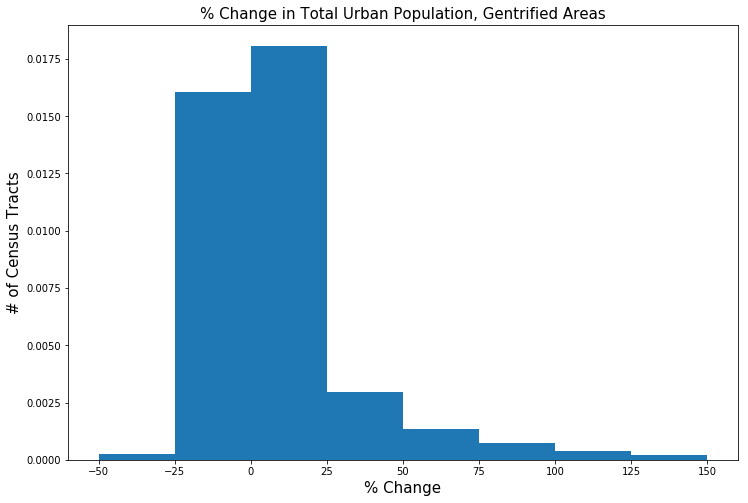

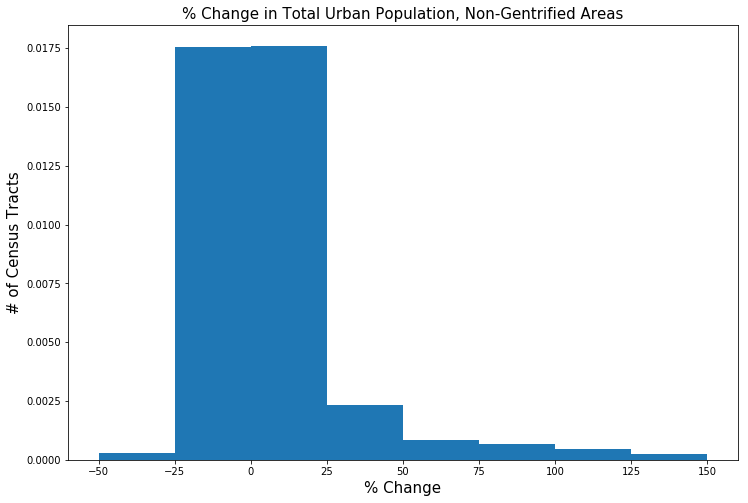

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.hist(gentrified_change_urban, bins=[-50, -25, 0, 25, 50, 75, 100, 125, 150], density=True)
plt.title("% Change in Total Urban Population, Gentrified Areas", fontsize=15)
plt.ylabel("# of Census Tracts", fontsize=15)
plt.xlabel("% Change", fontsize=15)


plt.figure(figsize=(12, 8))
plt.hist(non_gentrified_change_urban, bins=[-50, -25, 0, 25, 50, 75, 100, 125, 150], density=True)
plt.title("% Change in Total Urban Population, Non-Gentrified Areas", fontsize=15)
plt.ylabel("# of Census Tracts", fontsize=15)
plt.xlabel("% Change", fontsize=15)



It appears, from this graph, this is not the best indicator of gentrified vs. non-gentrified.

Next, we create an EDA visualization for what percent of census tracts are above and below the state mean average in terms of a 10-year change in % difference in # of units renters occupied.

In [48]:
lst = (joined[joined["y"] == 0]["% Difference Hispanic or Latino_y"] < joined[joined["y"] == 0]["% Difference Hispanic or Latino_x"])*1

Text(0.5,0,'Categories')

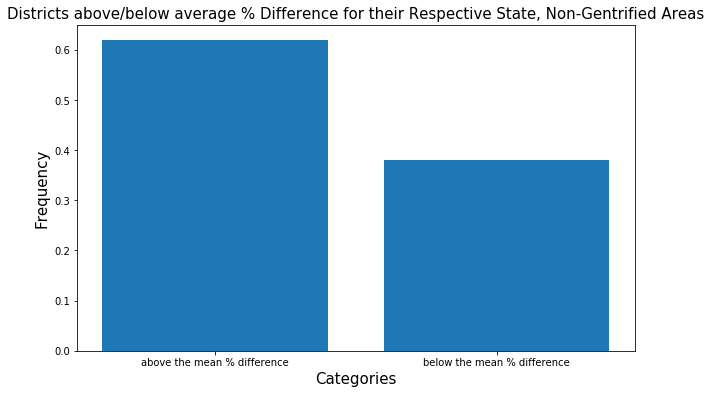

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(["above the mean % difference", "below the mean % difference"], [sum(lst)/len(lst), (len(lst) - sum(lst))/len(lst)])
plt.title("Districts above/below average % Difference for their Respective State, Non-Gentrified Areas", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Categories", fontsize=15)

In [52]:
lst2 = (joined["% Difference Hispanic or Latino_y"] < joined["% Difference Hispanic or Latino_x"])*1

<BarContainer object of 2 artists>

<Figure size 720x432 with 0 Axes>

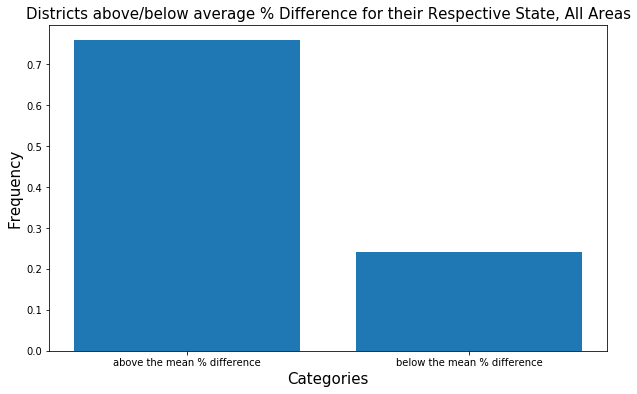

In [60]:
plt.figure(figsize=(10, 6))
plt.title("Districts above/below average % Difference for their Respective State, All Areas", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Categories", fontsize=15)
plt.bar(["above the mean % difference", "below the mean % difference"], [sum(lst2)/len(lst2), (len(lst2) - sum(lst2))/len(lst2)])

As we can see, non-gentrified areas have a % change of hispanic/latino population on average closer to or below the mean of the state (gentrified areas more dramatic).

In [105]:
gent_pop = result[result["y"]==1]["Population % Change"]
non_pop = result[result["y"]==0]["Population % Change"]

Population Change EDA

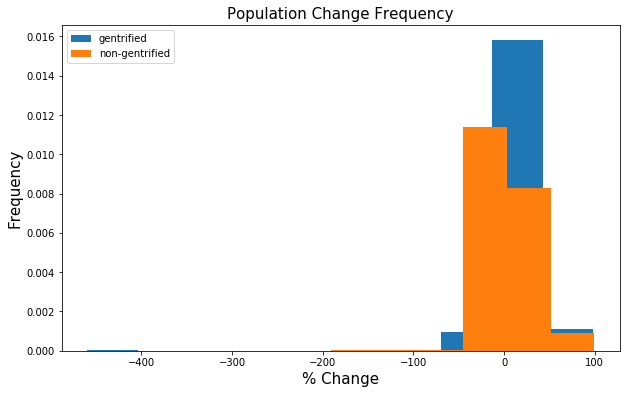

In [115]:
plt.figure(figsize=(10, 6))
plt.title("Population Change Frequency", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("% Change", fontsize=15)
plt.hist(gent_pop, density=True, label = "gentrified")
plt.hist(non_pop, density=True,label = "non-gentrified")
plt.legend()

# Dimensionality Reducation/PCA

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [66]:
#for future reference
warnings.filterwarnings("ignore")
result_cleaned = result.copy(deep=True)

In [67]:
result.fillna(0, inplace=True)

In [68]:
for col in result.columns.values:
    result[col] = pd.to_numeric(result[col], errors='coerce').fillna(0, downcast='infer')

In [69]:
#create x matrix for training/learning
x = result.iloc[:, 1:].values
x = StandardScaler().fit_transform(x)

Next, we use SVD on our Data Matrix X to determine how many principal components we should use (how many features contain the orthogonal directions of most variance) in our resulting X_pca.

In [70]:
u, s, v = np.linalg.svd(x.T)

Text(0.5,0,'Singular Values Corresponding to the ith Loading Vector v')

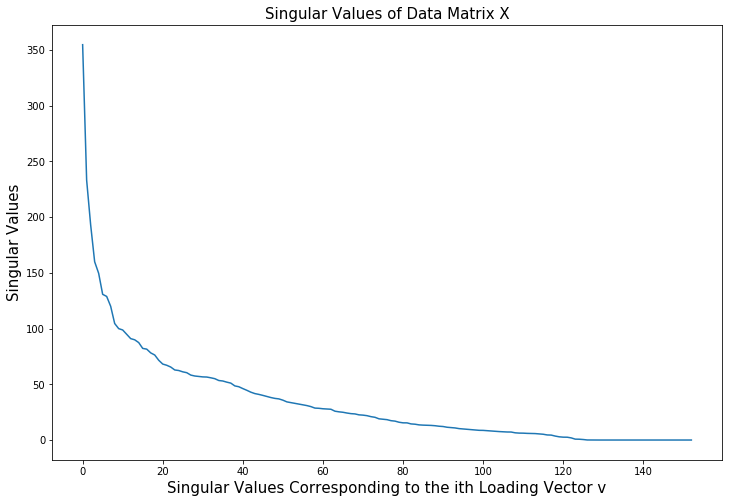

In [71]:
plt.figure(figsize=(12, 8))
plt.plot(s)
plt.title("Singular Values of Data Matrix X", fontsize=15)
plt.ylabel("Singular Values", fontsize=15)
plt.xlabel("Singular Values Corresponding to the ith Loading Vector v", fontsize=15)

We will see how much of the explained variance is captured by the first $k$ principal components to decide how many components to use in the resulting data matrix $X$.

In [72]:
#find the covariance matrix of X
cov = np.cov(x.T)
eig_vals, eig_vecs = np.linalg.eig(cov)
print(eig_vals[:10])

[ 37.35970503+0.j  16.14896957+0.j  11.07282786+0.j   7.59845684+0.j
   6.64413879+0.j   4.92991116+0.j   5.07477056+0.j   4.27621275+0.j
   3.24601380+0.j   2.96630194+0.j]


In [73]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

Text(0.5,0,'# of Principal Components')

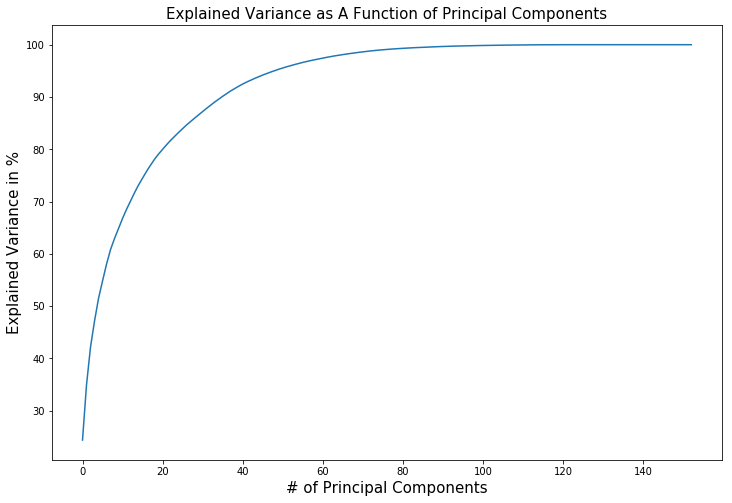

In [74]:
plt.figure(figsize=(12, 8))
plt.plot(range(len(cum_var_exp)), cum_var_exp)
plt.title("Explained Variance as A Function of Principal Components", fontsize=15)
plt.ylabel("Explained Variance in %", fontsize=15)
plt.xlabel("# of Principal Components", fontsize=15)


It appears that we need ~40 principal components, since it captures about 90% of the explained variance in the dataset.

In [75]:
pca = PCA(n_components=40)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

In [76]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,7.036160,-2.107864,1.965637,-2.413809,0.265721,0.934802,-4.239037,1.818990,0.011585,-2.103160,...,-0.316077,0.427706,0.467667,0.094660,-0.498757,-0.080258,0.208472,-1.034850,-0.533154,1.660855
1,7.708466,-2.099753,0.800107,-1.920088,0.773181,3.431866,-3.145204,-1.975149,0.078511,0.242660,...,0.222440,-0.127386,0.403450,0.122853,-0.149719,-0.290265,0.405201,-2.044248,-1.528568,3.277071
2,-1.672724,-1.618412,1.193779,-0.476033,0.109580,1.643832,-2.326335,-0.975830,0.058182,0.149045,...,-0.063063,0.280423,0.196363,0.004052,-0.072847,0.388461,0.133065,-0.735400,-0.697589,0.890367
3,0.906894,-1.842447,2.767137,-2.176191,0.729672,1.506016,-1.204034,-1.624899,0.698050,-0.270748,...,-0.809498,0.061121,1.308828,0.378373,0.426585,-0.665305,-0.361922,-0.089768,-0.168248,1.407567
4,-1.152361,-1.940723,-0.946542,-2.510582,0.936580,2.409268,-2.853759,-1.246426,0.970351,-1.511077,...,-0.128485,-0.134780,0.550858,0.004237,0.504990,-0.477659,-0.014052,-0.268307,-1.365376,2.022014


Here's an example of a plot of the top-2 principal components and the directions of greatest variance.

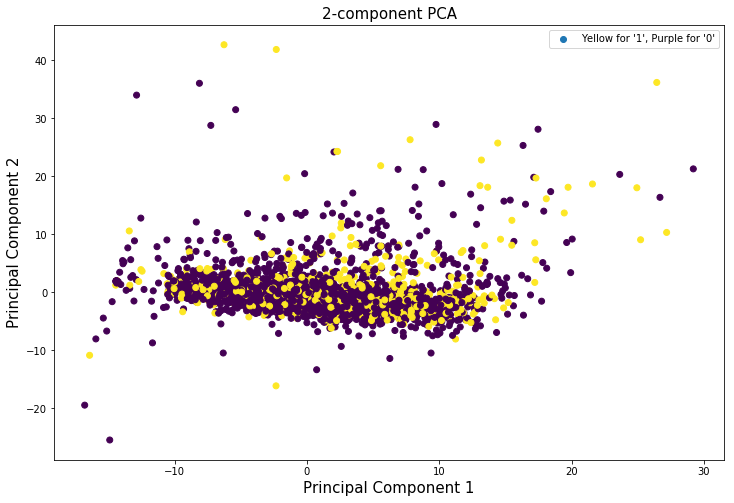

In [77]:
#plot the first two principal components on the same axis
plt.figure(figsize = (12,8))
plt.scatter(principalDf[0], principalDf[1], c=result["y"], label = "Yellow for '1', Purple for '0'")
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2-component PCA', fontsize = 15)
plt.legend()

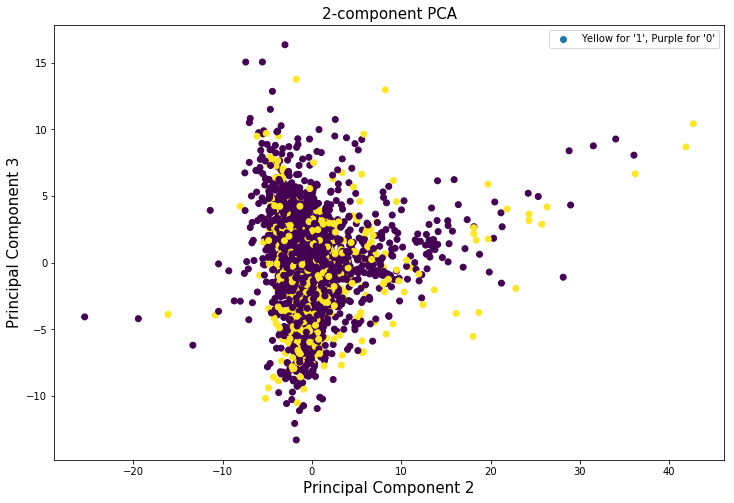

In [78]:
#Next 2 Principal Components
#plot the first two principal components on the same axis
plt.figure(figsize = (12,8))
plt.scatter(principalDf[1], principalDf[2], c=result["y"], label = "Yellow for '1', Purple for '0'")
plt.xlabel('Principal Component 2', fontsize = 15)
plt.ylabel('Principal Component 3', fontsize = 15)
plt.title('2-component PCA', fontsize = 15)
plt.legend()

# Training the Model

"x": Data Matrix


"principalComponents": Post-processed data matrix


"y": labels

In [79]:
#Train Test Split -- 20% Split
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.2, random_state=42)


Using 5-fold cross validation to find best regularization parameter. The goal of cross validation is to average the validation results to estimate how well the model predicts our y values. It also gives insight into how well our model wil perform on a fresh, independent set of data and helps identify potential points of concern such as selection bias and/or overfitting the data. We also vary our C value, which is the inverse of the strength of the regularizer. Varying C allows us to inspect how the model performs with varying degrees of regularization, which is important in combatting overfitting.

In [95]:
#using l1-loss
from sklearn.model_selection import cross_val_score
for i in [.001, .01, .1, 1, 10, 100, 1000]:
    clf = LogisticRegression(penalty='l1', C=i, max_iter = 1000)
    scores = cross_val_score(clf, x_train, y_train, cv=5)
    print(i, ":", "Folds Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

0.001 : Folds Accuracy: 0.7496 (+/- 0.0004)
0.01 : Folds Accuracy: 0.9930 (+/- 0.0079)
0.1 : Folds Accuracy: 0.9985 (+/- 0.0028)
1 : Folds Accuracy: 0.9989 (+/- 0.0018)
10 : Folds Accuracy: 0.9989 (+/- 0.0018)
100 : Folds Accuracy: 0.9993 (+/- 0.0018)
1000 : Folds Accuracy: 0.9981 (+/- 0.0033)


In [96]:
#using l2-loss
from sklearn.model_selection import cross_val_score
for i in [.001, .01, .1, 1, 10, 100, 1000]:
    clf = LogisticRegression(penalty='l2', C=i, max_iter = 1000)
    scores = cross_val_score(clf, x_train, y_train, cv=5)
    print(i, ":", "Folds Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

0.001 : Folds Accuracy: 0.9985 (+/- 0.0028)
0.01 : Folds Accuracy: 0.9993 (+/- 0.0018)
0.1 : Folds Accuracy: 0.9993 (+/- 0.0018)
1 : Folds Accuracy: 0.9996 (+/- 0.0015)
10 : Folds Accuracy: 0.9996 (+/- 0.0015)
100 : Folds Accuracy: 0.9996 (+/- 0.0015)
1000 : Folds Accuracy: 0.9996 (+/- 0.0015)


We chose to use logistic regression as a model choice, because of the way our labels were constructed and then evaluated (based on the above factors of % change in renter occupied units, total population, and difference in Hispanic/Latino population). After we categorized areas as gentrified or not (our dependent variable), we then moved to use sklearn's logistic regression linear model to estimate our training and test accuracies.

In [98]:
logreg = LogisticRegression(penalty='l2', C=10, max_iter = 1000)
logreg.fit(x_train, y_train)
logreg_train_acc = logreg.score(x_train, y_train)
logreg_test_acc = logreg.score(x_test, y_test)
print('logreg training accuracy =', logreg_train_acc)
print('logreg test accuracy =', logreg_test_acc)

logreg training accuracy = 1.0
logreg test accuracy = 0.997037037037


# Bias-Variance Tradeoff Visualization

Here, we will plot the test vs. train accuracy as we increase (or decrease) the complexity of the model. This way, we can check for overfitting and underfitting, etc.

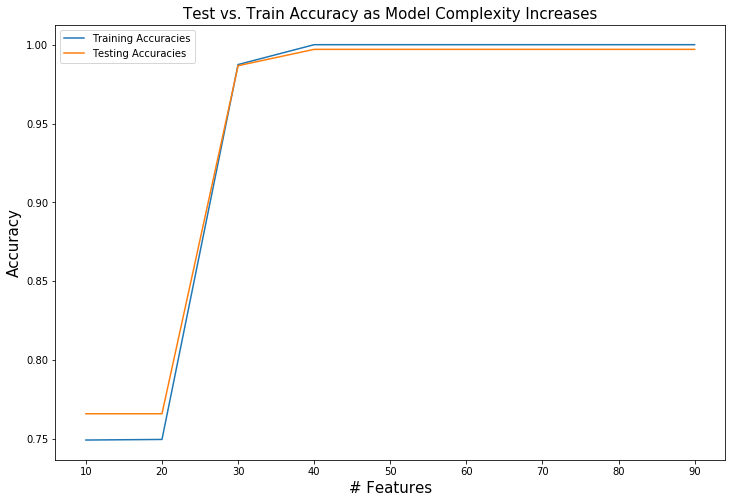

In [86]:
features = [10, 20, 30, 40, 50, 60, 70, 80, 90]
train_acc = []
test_acc = []
for num_feat in features:
    pca = PCA(n_components=num_feat)
    principalComponents = pca.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.2, random_state=42)


    model = LogisticRegression(penalty='l2', max_iter = 1000)
    logreg.fit(x_train, y_train)
    train_acc.append(logreg.score(x_train, y_train))
    test_acc.append(logreg.score(x_test, y_test))

plt.figure(figsize = (12,8))
plt.plot(features, train_acc, label = "Training Accuracies")
plt.plot(features, test_acc, label = "Testing Accuracies")
plt.xlabel('# Features', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Test vs. Train Accuracy as Model Complexity Increases', fontsize = 15)
plt.legend()

# Random Forests

We also used a Random forest model to aid in our classification. Random forests help in fitting n_estimator number of classifiers on given samples of our training data and use the entropy of each outcome to make a prediction.

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

In [90]:
random_forest = RandomForestClassifier(criterion="entropy")
random_forest.fit(x_train, y_train)
random_forest_train_acc = random_forest.score(x_train, y_train)
random_forest_test_acc = random_forest.score(x_test, y_test)
print('random_forest training acuracy= ',random_forest_train_acc)
print('random_forest test accuracy= ', random_forest_test_acc)

random_forest training acuracy=  0.998887240356
random_forest test accuracy=  0.982222222222


# Perceptron

We used another classification model known as the perceptron for binary classification. A perceptron is considered to be similar to back-end structure of sklearn's SGD classifier. Perceptron in itself is a linear classifier and is considered to be a single layer neural network with customizable parameters such as regularization parameter to again combat overfitting.

In [91]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
perceptron_train_acc = perceptron.score(x_train, y_train)
perceptron_test_acc = perceptron.score(x_test, y_test)
print ('perceptron training acuracy= ',perceptron_train_acc) 
print('perceptron test accuracy= ',perceptron_test_acc)

perceptron training acuracy=  0.993323442136
perceptron test accuracy=  0.991111111111


# SVM

We also explored into using SVM (Support vector machine) and used a support vector classification to aid in our modelling. The goal of SVM is to create a hyperplane to separate out our data points based on the y-labels they correspond to. The best hyperplane corresponds to the largest margin between two classes for a linear classifier. Data that remain on the margin are called the "support vectors". A larger margin corresponds to a overall lower generalization error for the classifier.

In [92]:
from sklearn.svm import SVC

In [100]:
#cross-val to find best reg. parameter
from sklearn.model_selection import cross_val_score
for i in [.001, .01, .1, 1, 10, 100, 1000]:
    clf = SVC(C=i)
    scores = cross_val_score(clf, x_train, y_train, cv=5)
    print(i, ":", "Folds Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

0.001 : Folds Accuracy: 0.7496 (+/- 0.0004)
0.01 : Folds Accuracy: 0.7496 (+/- 0.0004)
0.1 : Folds Accuracy: 0.9069 (+/- 0.0099)
1 : Folds Accuracy: 0.9740 (+/- 0.0071)
10 : Folds Accuracy: 0.9792 (+/- 0.0109)
100 : Folds Accuracy: 0.9792 (+/- 0.0109)
1000 : Folds Accuracy: 0.9792 (+/- 0.0109)


In [102]:
svm = SVC(C=100)
svm.fit(x_train, y_train)
svm_acc = svm.score(x_train, y_train)
svm_test_acc = svm.score(x_test, y_test)
print('random_forest training acuracy= ',svm_acc)
print('random_forest test accuracy= ', svm_test_acc)

random_forest training acuracy=  1.0
random_forest test accuracy=  0.988148148148
